In [8]:
import requests
import os
import zipfile
import shutil
import geopandas as gpd
import json
import matplotlib.pyplot as plt 

In [13]:
# Get url
url = r"https://gisdata.mn.gov/api/3/action/package_show?id=us-mn-state-metc-trans-transit-routes"
geo_commons_get = requests.get(url, verify=False) # verify = False as response to Web API warning

c:\Users\jake1\AppData\Local\Programs\Python\Python310\lib\site-packages\urllib3\connectionpool.py:1095: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gisdata.mn.gov'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [10]:
# Set shp directory
geo_commons_fh = r'C:\Users\jake1\OneDrive\Desktop\GIS5571\Lab1\geocommons_data_shp\shp_trans_transit_routes'
# Select zip file
Mn_Geodataurl = r'https://resources.gisdata.mn.gov/pub/gdrs/data/pub/us_mn_state_metc/trans_transit_routes/shp_trans_transit_routes.zip'
# Get URL
geo_commons_get_final = requests.get(Mn_Geodataurl, stream=True)

# Create folder
geo_commons_shp = r'C:\Users\jake1\OneDrive\Desktop\GIS5571\Lab1\geocommons_data_shp'
# Make new folder if not already there
if not os.path.exists(geo_commons_shp):
    os.mkdir(geo_commons_shp)


In [11]:

# Open new folder
with open (geo_commons_fh,'wb') as file:
    shutil.copyfileobj(geo_commons_get_final.raw, file) # Copy binary object to new file
    
# Read in from zip 
with zipfile.ZipFile (geo_commons_fh, 'r') as geo_commons_zip: # Assign zip file
    geo_commons_zip.extractall(geo_commons_shp) # Extract contents
    
geo_commons_data = gpd.read_file(geo_commons_shp +'\TransitRoutes.shp') # Read shp

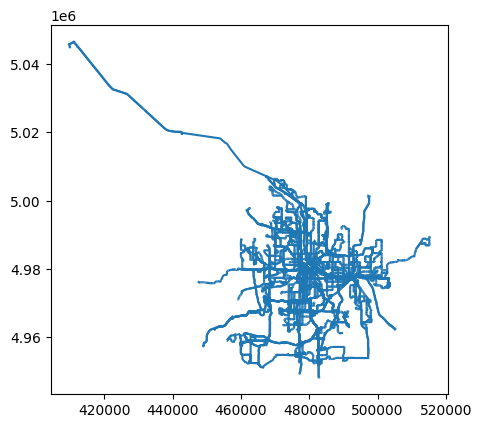

In [14]:
# Illustrate that I successfully received the data
import matplotlib.pyplot as plt
geo_commons_data.plot()
plt.show()